In [23]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [24]:
df=pd.read_csv('fake_or_real_news.csv')

In [25]:
# df.shape

In [26]:
# df.head()

In [27]:
labels=df.label
# labels.head()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [29]:
# x_train.shape

In [30]:
# x_test.shape

In [31]:
tfidf =TfidfVectorizer(stop_words='english', max_df=0.7)

In [32]:
tfidf_train=tfidf.fit_transform(x_train) 
tfidf_test=tfidf.transform(x_test)

In [33]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [34]:
y_pred=pac.predict(tfidf_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import math

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[591  47]
 [ 39 590]]


Accuracy for test set = 93.21231254932913 (94 percent)
Precision for test set = 92.6332288401254 (93 percent)
Recall for test set = 93.80952380952381 (94 percent)
F1 for test set = 93.21766561514197 (94 percent)


<AxesSubplot:>

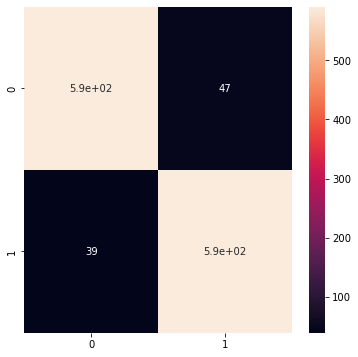

In [37]:
from sklearn.metrics import confusion_matrix
import math
import seaborn as sns
import matplotlib.pyplot as plt

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
accuracy=((TP+TN)/(TP+TN+FP+FN))*100
precision=(TP/(TP+FP))*100
recall=(TP/(TP+FN))*100
F1=2*(1/((1/precision)+(1/recall)))
print('Accuracy for test set =', accuracy , "(%d percent)" %math.ceil(accuracy))
print('Precision for test set =', precision, "(%d percent)" %math.ceil(precision))
print('Recall for test set =',recall, "(%d percent)" %math.ceil(recall))
print('F1 for test set =', F1, "(%d percent)" %math.ceil(F1))

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True)